# Mini Project: Brand Loyalty and Location

What would you like to know?  
We would like to know if there is a correlation between a student's brand preference and reisdence location. 

# Data Used

We chose to narrow down the data from student's responses on the questionaire to just student's location, shoe preference, fast food preference, phone brand preference, soda brand preference, and music streaming platform preference. We handled noise by filling in the NAN responses with "No Preference". We also binned our data so that if there is less than 2 responses for a certain category, we would classify it as "Other".


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go 

df = pd.read_csv("Responses.csv")

df.loc[:,'Shoe'] = df.loc[:,'Shoe'].replace(np.nan, "No Preference")
df.loc[:,'Location'] = df.loc[:,'Location'].replace(np.nan, "Southern California")

df['Shoe'] = df['Shoe'].replace({'sketchers':'Other'})
df['Shoe'] = df['Shoe'].replace({'Puma':'Other'})
df['Shoe'] = df['Shoe'].replace({'puma':'Other'})
df['Shoe'] = df['Shoe'].replace({'Asics':'Other'})
df['Shoe'] = df['Shoe'].replace({'saucony':'Other'})
df['Shoe'] = df['Shoe'].replace({'Shoes like pottery':'Other'})
df['Shoe'] = df['Shoe'].replace({'Reeboks':'Other'})
df['Shoe'] = df['Shoe'].replace({'New Balance':'Other'})

df['Location'] = df['Location'].replace({'Central California':'Northern California'})
df['Location'] = df['Location'].replace({'Out of State (Within U.S)':'International'})
df.head(3)


Timestamp             Location           Shoe  Fast Food  \
0  11/3/2022 1:35:26  Southern California  No Preference  McDonalds   
1  11/3/2022 8:15:03        International          Other     wendys   
2  11/3/2022 8:33:24  Southern California           Nike   In-N-Out   

                               Phone       Soda        Music  
0                      No Preference     Sprite      Youtube  
1                            Samsung  Coca Cola  Apple Music  
2  Just prefer android over apple os  Dr Pepper      Spotify

# 3 Hypothesis:
1) International Students will prefer brands that are not very popular in California.  
2) There is a correlation between a students location (Southern California & International) and favorite food and shoe brand. 
3) There will be a clear difference between fast food preference for southern californians vs. northern californians




# Data Represented As a Heatmap
Here all the data we are using is represented as a heatmap.

<AxesSubplot:xlabel='Brands', ylabel='Location'>

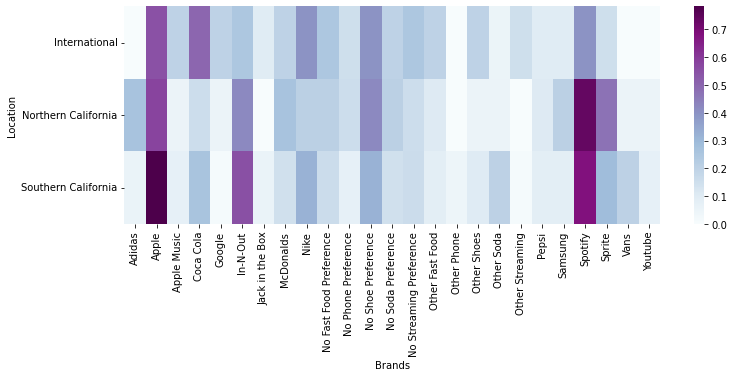

In [2]:
plt.figure(figsize=(12, 4))

heatdata = pd.read_csv("CS105Data3.csv")
heatdata.head()
heat = heatdata.pivot_table(values = "Amount %", index = "Location", columns = "Brands")
sns.heatmap(heat, cmap="BuPu")


This heatmap shows the frequency a brand was picked depending on where you are from. So each row is the frequency from that location. Some points of interest are that International students don’t use Spotify as much as people from California. In-N-Out was also not as popular to International students compared to students from California.

# Deeper Look at Shoe Data Using a Displot
Here a displot is being used to display the different ratios each brand makes up for responses relative to the location of residence of students.

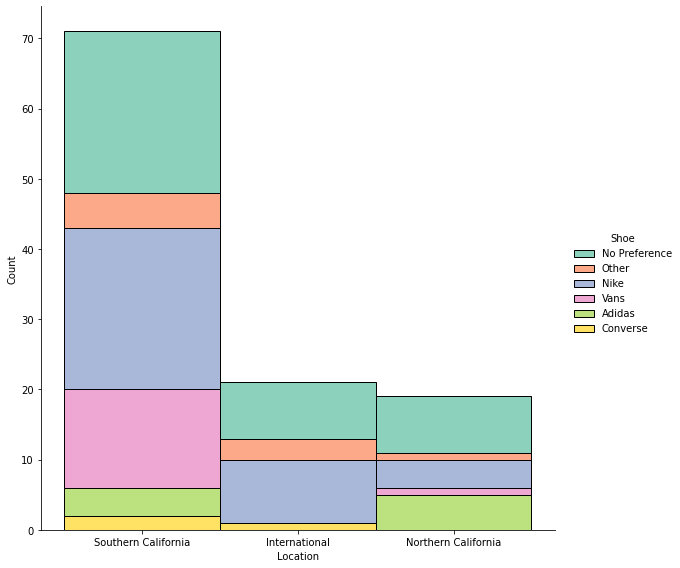

In [3]:
%matplotlib inline
sns.displot(data=df, x="Location", hue="Shoe", multiple="stack", height=8, palette = "Set2")

From the displot we can see that the majority of students have no preference in shoe brand no matter where they are from. Ignoring the people that replied no preference we can see that Nike makes up the next largest majority for each location. 

# Analyzing Soda and Music Streaming Preference Relative to Location 

A Spider Plot is being used here to...

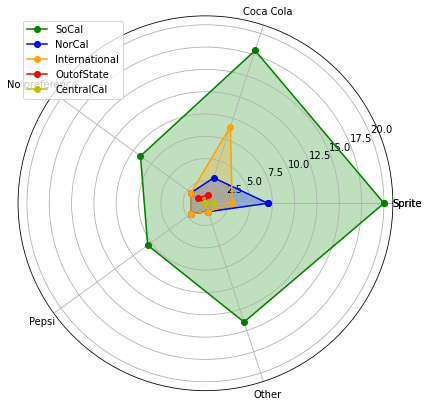

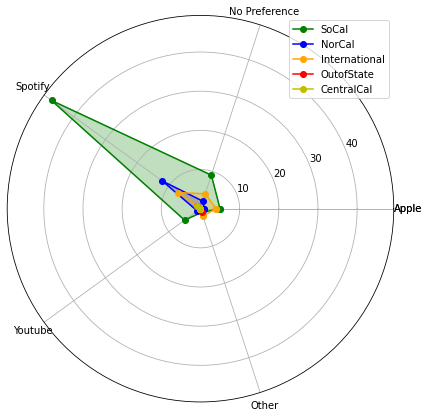

In [4]:
brands = ['Sprite', 'Coca Cola', 'No preference', 'Pepsi', 'Other']
SoCal=[20, 18, 9, 8, 14]
NorCal=[7,3,2,2,1]
International=[3,9,2,2,1]
OutofState=[0,1,1,0,0]
CentralCal=[1,0,0,0,0]
 
angles=np.linspace(0, 2*np.pi, len(brands), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
 
brands.append(brands[0])
SoCal.append(SoCal[0])
NorCal.append(NorCal[0])
International.append(International[0])
OutofState.append(OutofState[0])
CentralCal.append(CentralCal[0])
 
spider=plt.figure(figsize=(6,6))
ax=spider.add_subplot(polar=True)
ax.plot(angles,SoCal, 'o-', color='g', label='SoCal')
ax.fill(angles,SoCal, alpha=0.25, color='g')
 
ax.plot(angles,NorCal, 'o-', color='blue', label='NorCal')
ax.fill(angles,NorCal,alpha=0.25, color='blue')
 
ax.plot(angles,International, 'o-', color='orange', label='International')
ax.fill(angles,International,alpha=0.25, color='orange')
 
ax.plot(angles,OutofState, 'o-', color='red', label='OutofState')
ax.fill(angles,OutofState,alpha=0.25, color='red')
 
ax.plot(angles,CentralCal, 'o-', color='y', label='CentralCal')
ax.fill(angles,CentralCal,alpha=0.25, color='y')
 
ax.set_thetagrids(angles*180/np.pi, brands)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()
 
platforms=[ 'Apple', 'No Preference', 'Spotify', 'Youtube', 'Other']
SCal=[5,9,47,5,1]
NCal=[1,2,12,1,0]
Inational=[4,4,7,0,2]
OState=[0,0,1,0,1]
Ccal=[0,0,1,0,0]
 
 
angle=np.linspace(0, 2*np.pi, len(platforms), endpoint=False)
angle=np.concatenate((angle,[angle[0]]))
 
 
platforms.append(platforms[0])
SCal.append(SCal[0])
NCal.append(NCal[0])
OState.append(OState[0])
Inational.append(Inational[0])
Ccal.append(Ccal[0])
 
 
spyder=plt.figure(figsize=(6,6))
ax=spyder.add_subplot(polar=True)
ax.plot(angles,SCal, 'o-', color='g', label='SoCal')
ax.fill(angles,SCal, alpha=0.25, color='g')
 
ax.plot(angles,NCal, 'o-', color='blue', label='NorCal')
ax.fill(angles,NCal,alpha=0.25, color='blue')
 
ax.plot(angles,Inational, 'o-', color='orange', label='International')
ax.fill(angles,Inational,alpha=0.25, color='orange')
 
ax.plot(angles,OState, 'o-', color='red', label='OutofState')
ax.fill(angles,OState,alpha=0.25, color='red')
 
ax.plot(angles,Ccal, 'o-', color='y', label='CentralCal')
ax.fill(angles,Ccal,alpha=0.25, color='y')
 
ax.set_thetagrids(angles*180/np.pi, platforms)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


From the spider plot we see that...

# Representing Fast Food Preference Using a Joint Plot
Here we use a joint plot to...

0 = Mcdonalds 1 = In n Out 2 = Jack in the box, 3 = No Fast Food, 4 = Other Fast Food


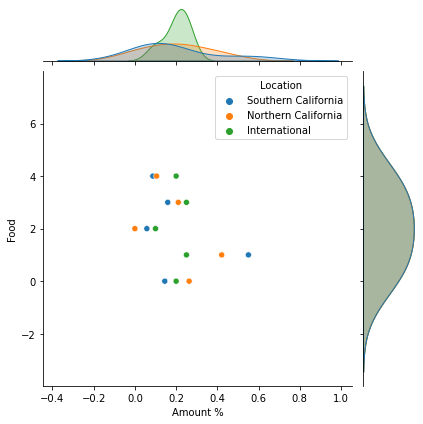

In [8]:
import sys
import plotly.express as px
import plotly.graph_objects as go 


plotdata = pd.read_csv("CS105Data4.csv")
plotdata['Food'] = pd.factorize(plotdata['Food'])[0]
plotdata.head(17)



sns.jointplot(data=plotdata,x="Amount %",y="Food",hue= "Location")
print("0 = Mcdonalds 1 = In n Out 2 = Jack in the box, 3 = No Fast Food, 4 = Other Fast Food")


The joint plot showed us that...

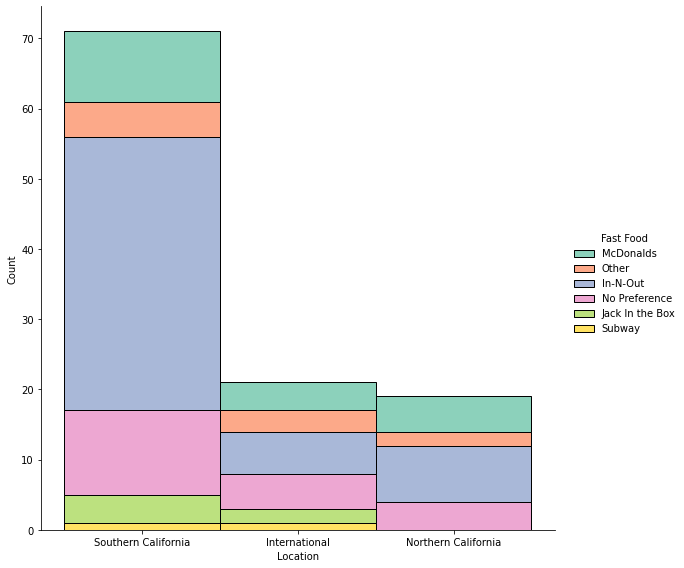

In [6]:
sns.displot(data=df, x="Location", hue="Fast Food", multiple="stack", height=8, palette = "Set2")

# Using Bubble Plot to Analyze Music Streaming VS Fast Food Preference

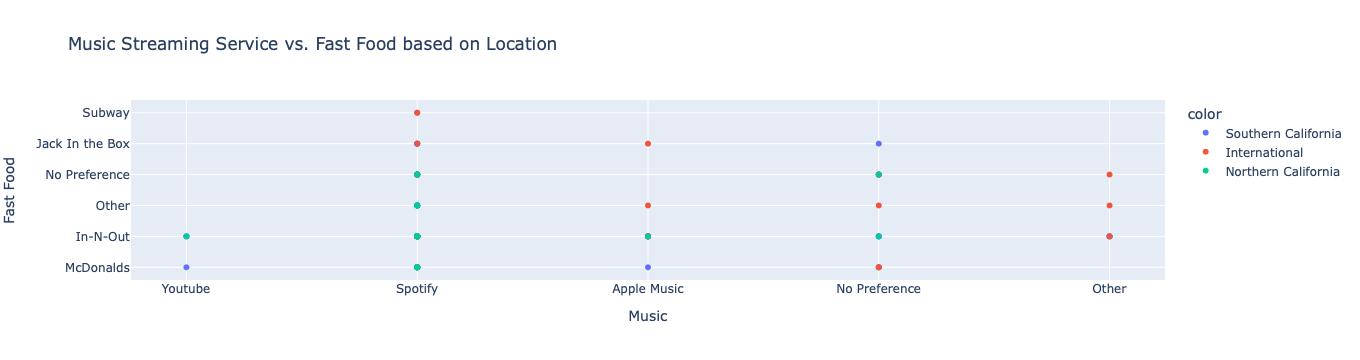

In [7]:
loc = df.Location.astype(str)

df['Music'] = df['Music'].replace({'Amazon Prime Music':'Other'})
df['Music'] = df['Music'].replace({'YouTube Music':'Other'})
df['Music'] = df['Music'].replace({'Youtube Music':'Other'})
df['Music'] = df['Music'].replace({'QQ music':'Other'})
df['Music'] = df['Music'].replace({'Wang Yi Yun':'Other'})
df['Music'] = df['Music'].replace({'SoundCloud ':'Other'})
df['Fast Food'] = df['Fast Food'].replace({'wendys':"Wendy's"})
df['Fast Food'] = df['Fast Food'].replace({'Panda Express':"Other"})
df['Fast Food'] = df['Fast Food'].replace({'Panda Express':"Other"})
df['Fast Food'] = df['Fast Food'].replace({'Chipotle':"Other"})
df['Fast Food'] = df['Fast Food'].replace({'chick fill a or in and out':"Chick-fil-a"})
df['Fast Food'] = df['Fast Food'].replace({'Del Taco':"Other"})
df['Fast Food'] = df['Fast Food'].replace({'Tacobell':"Taco Bell"})

fig = px.scatter(df, x='Music', y='Fast Food',
	         title='Music Streaming Service vs. Fast Food based on Location', color=loc, size_max=60)

fig.show()


This Scatter/Basic Bubble plot shows that a majority of Southern Californian students stick to 'In-N-Out' and 'Spotify' as their choices. Internationally-based students tend like most fast food places except 'In-N-Out', which makes sense since In-N-Out does not have an international presence. Overall this visualizations shows there appears to be no correlation between music streaming servies and fast-food preferences in relation to location. Also, as we can see in most of the other visualizations a lot of students responeded with 'No Preference'.

# Testing Hypothesis 1

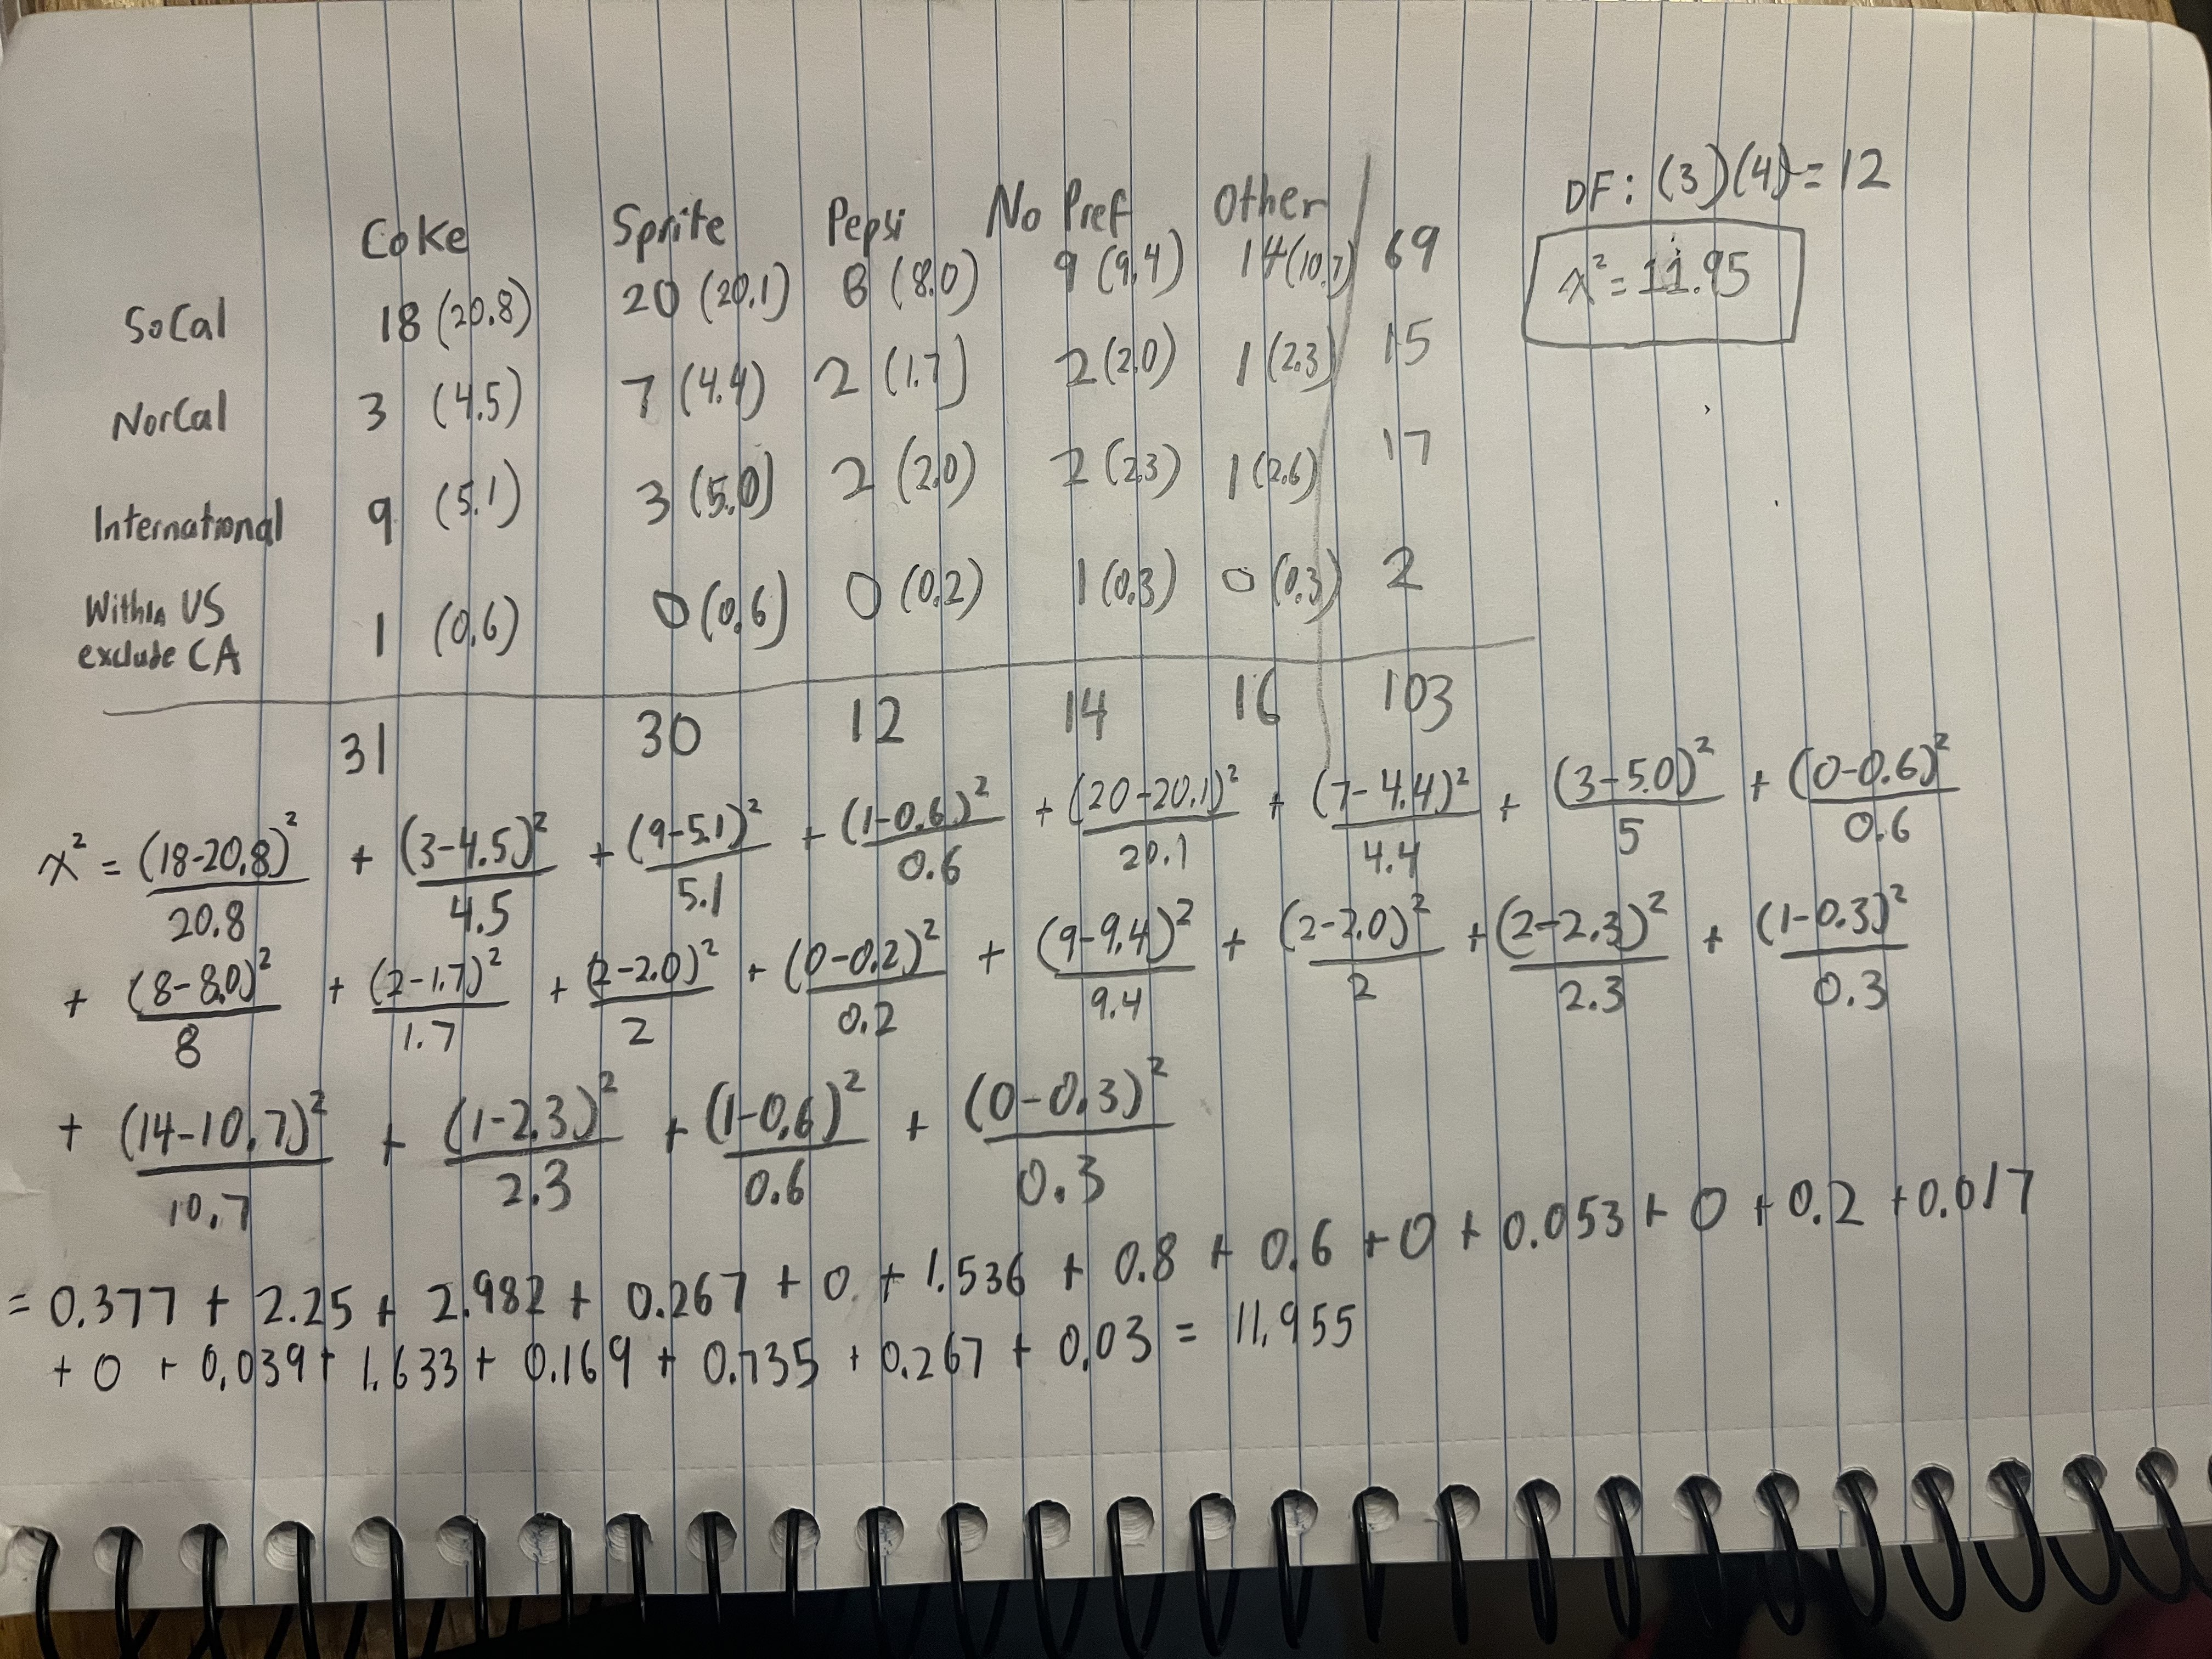

With a degree of freedom of 12, the chi squared value needed to reject the null hypothesis is 11.95. Looking at a significance level of 0.05, we see that our chi square value doesn’t match the minimum value of 21.026 to reject the null hypothesis. We can say that there isn’t enough evidence to say that out of state students will prefer brands that are most popular in the US. There is a 0.05(5%) risk that there actually is an association between these two variables. Our data however says the lack of evidence doesn’t necessarily mean that the correlation doesn’t exist.

# Testing Hypothesis 2


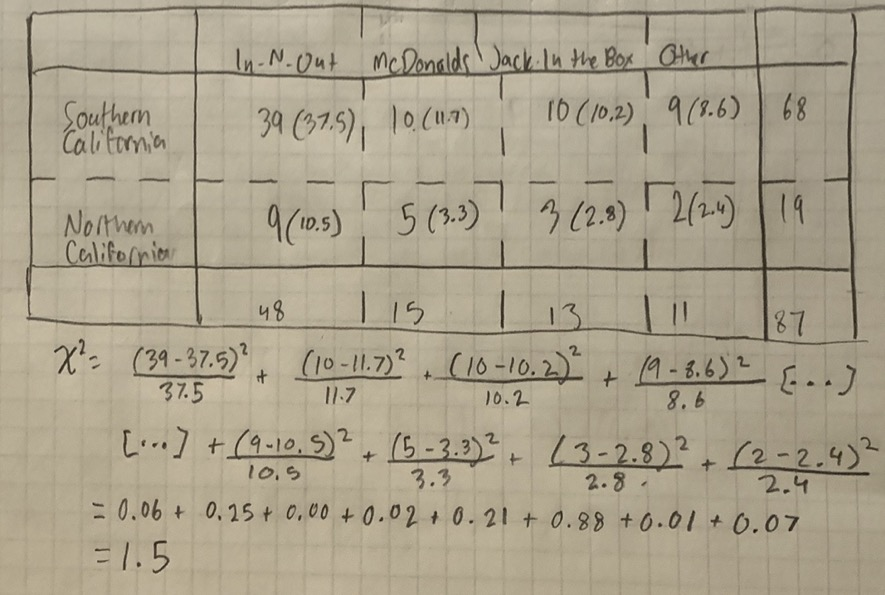